<a href="https://colab.research.google.com/github/shekhs/NN_overfit_prevention/blob/main/sonar_data_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Handling overfitting in deep neural **network**

In [2]:
df = pd.read_csv("sonar.csv",header=None,skiprows=1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,Rock
94,0.0025,0.0309,0.0171,0.0228,0.0434,0.1224,0.1947,0.1661,0.1368,0.1430,...,0.0149,0.0077,0.0036,0.0114,0.0085,0.0101,0.0016,0.0028,0.0014,Rock
50,0.0353,0.0713,0.0326,0.0272,0.0370,0.0792,0.1083,0.0687,0.0298,0.0880,...,0.0163,0.0242,0.0043,0.0202,0.0108,0.0037,0.0096,0.0093,0.0053,Rock
87,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,...,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037,Rock
125,0.0228,0.0853,0.1000,0.0428,0.1117,0.1651,0.1597,0.2116,0.3295,0.3517,...,0.0172,0.0191,0.0260,0.0140,0.0125,0.0116,0.0093,0.0012,0.0036,Mine


In [10]:
X = df.drop(60,axis=1)
y=df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [11]:
y.sample(5)

52     Rock
120    Mine
122    Mine
64     Rock
182    Mine
Name: 60, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = keras.Sequential([
    keras.layers.Dense(80,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
H = model.fit(X_train,y_train,epochs=100,batch_size=8,validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 2s 47ms/step - loss: 0.6936 - accuracy: 0.4954 - val_loss: 0.6865 - val_accuracy: 0.5532
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6874 - accuracy: 0.5872 - val_loss: 0.6806 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6794 - accuracy: 0.5413 - val_loss: 0.6723 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6694 - accuracy: 0.5413 - val_loss: 0.6587 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6576 - accuracy: 0.5780 - val_loss: 0.6415 - val_accuracy: 0.5957
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6410 - accuracy: 0.7339 - val_loss: 0.6177 - val_accuracy: 0.6383
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6226 - accuracy: 0.6972 - val_loss: 0.5953 - val_accuracy: 0.6809
Epoch 8/1

In [22]:
loss,acc = model.evaluate(X_test,y_test)
print("test_acc = " + str(100*acc) + " and test_loss = "+str(loss))

2/2 [==============================] - 0s 7ms/step - loss: 1.4410 - accuracy: 0.7500
test_acc = 75.0 and test_loss = 1.4410324096679688


In [23]:
loss,acc = model.evaluate(X_train,y_train)
print("train_acc = " + str(100*acc) + " and train_loss = "+str(loss))

5/5 [==============================] - 0s 8ms/step - loss: 0.3839 - accuracy: 0.9551
train_acc = 95.51281929016113 and train_loss = 0.38391876220703125


Text(0.5, 1.0, 'training vs validation loss')

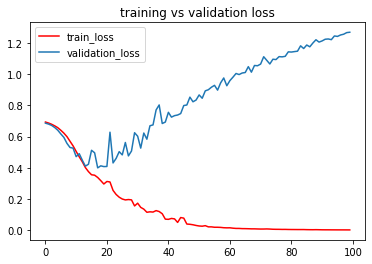

In [28]:
import matplotlib.pyplot as plt
epochs = np.arange(0,len(H.history['loss']))

plt.plot(epochs,H.history['loss'],label='train_loss',c='red')
plt.plot(epochs,H.history['val_loss'],label='validation_loss')
plt.legend()
plt.title("training vs validation loss")

Model is overfitting

Adding L2 regularizer

In [ ]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)


In [34]:
model = keras.Sequential([
    keras.layers.Dense(80,input_dim=60,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(30,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
H = model.fit(X_train,y_train,epochs=100,batch_size=8,validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 2s 48ms/step - loss: 11.0372 - accuracy: 0.5505 - val_loss: 9.9564 - val_accuracy: 0.6596
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 9.1565 - accuracy: 0.5688 - val_loss: 8.2410 - val_accuracy: 0.5745
Epoch 3/100
14/14 [==============================] - 0s 10ms/step - loss: 7.5714 - accuracy: 0.5872 - val_loss: 6.8079 - val_accuracy: 0.5745
Epoch 4/100
14/14 [==============================] - 0s 13ms/step - loss: 6.2562 - accuracy: 0.6422 - val_loss: 5.6285 - val_accuracy: 0.5745
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 5.1754 - accuracy: 0.6239 - val_loss: 4.6607 - val_accuracy: 0.5532
Epoch 6/100
14/14 [==============================] - 0s 16ms/step - loss: 4.2881 - accuracy: 0.5596 - val_loss: 3.8687 - val_accuracy: 0.5532
Epoch 7/100
14/14 [==============================] - 0s 13ms/step - loss: 3.5657 - accuracy: 0.5780 - val_loss: 3.2246 - val_accuracy: 0.5532
Epoch 

Text(0.5, 1.0, 'training vs validation loss')

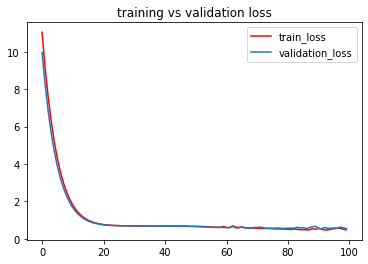

In [35]:
epochs = np.arange(0,len(H.history['loss']))

plt.plot(epochs,H.history['loss'],label='train_loss',c='red')
plt.plot(epochs,H.history['val_loss'],label='validation_loss')
plt.legend()
plt.title("training vs validation loss")

Adding dropout layer with L2 regularizer

In [38]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 2s 24ms/step - loss: 6.8665 - accuracy: 0.4862 - val_loss: 6.1795 - val_accuracy: 0.5532
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 5.6914 - accuracy: 0.5872 - val_loss: 5.1298 - val_accuracy: 0.5957
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 4.7216 - accuracy: 0.6147 - val_loss: 4.2626 - val_accuracy: 0.5745
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 3.9200 - accuracy: 0.6239 - val_loss: 3.5472 - val_accuracy: 0.6170
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 3.2791 - accuracy: 0.5321 - val_loss: 2.9679 - val_accuracy: 0.6170
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 2.7443 - accuracy: 0.5413 - val_loss: 2.4978 - val_accuracy: 0.5957
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 2.3112 - accuracy: 0.6422 - val_loss: 2.1162 - val_accuracy: 0.6596
Epoch 8/100


Text(0.5, 1.0, 'training vs validation loss')

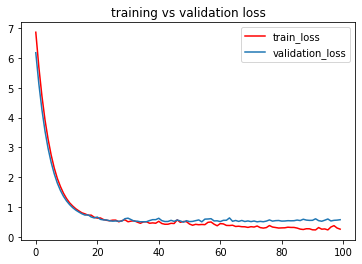

In [39]:
epochs = np.arange(0,len(H.history['loss']))

plt.plot(epochs,H.history['loss'],label='train_loss',c='red')
plt.plot(epochs,H.history['val_loss'],label='validation_loss')
plt.legend()
plt.title("training vs validation loss")

Early stopping

In [40]:

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    
    keras.layers.Dense(30, activation='relu'),
    
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=5)
)


Epoch 1/100
14/14 [==============================] - 1s 21ms/step - loss: 6.9772 - accuracy: 0.5046 - val_loss: 6.2917 - val_accuracy: 0.4894
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 5.7845 - accuracy: 0.5046 - val_loss: 5.2099 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 4.7880 - accuracy: 0.5505 - val_loss: 4.3146 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 3.9656 - accuracy: 0.5872 - val_loss: 3.5846 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 3.2975 - accuracy: 0.5780 - val_loss: 2.9909 - val_accuracy: 0.5319
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 2.7594 - accuracy: 0.5321 - val_loss: 2.5104 - val_accuracy: 0.5532
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 2.3199 - accuracy: 0.6055 - val_loss: 2.1236 - val_accuracy: 0.5957
Epoch 8/100


Text(0.5, 1.0, 'training vs validation loss')

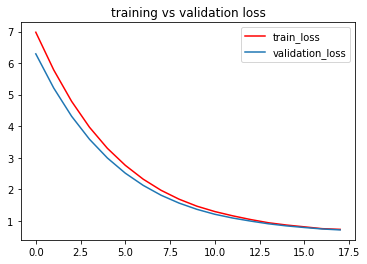

In [41]:
epochs = np.arange(0,len(H.history['loss']))

plt.plot(epochs,H.history['loss'],label='train_loss',c='red')
plt.plot(epochs,H.history['val_loss'],label='validation_loss')
plt.legend()
plt.title("training vs validation loss")

In [42]:

from tensorflow.keras.callbacks import ModelCheckpoint

model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('SOMETHINGELSE', monitor="val_loss", mode="min",
	save_best_only=True, verbose=1),
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=5)
callbacks = [checkpoint,earlystopping]


H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=callbacks) #To discover the training epoch on which training was stopped, the “verbose” argument can be set to 1. Once stopped, the callback will print the epoch number., Add "patience" to wait for sometime before stopping after the best accuracy or val_loss has been found.


Epoch 1/100
11/14 [======================>.......] - ETA: 0s - loss: 0.6900 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 0.67357, saving model to SOMETHINGELSE
14/14 [==============================] - 3s 175ms/step - loss: 0.6869 - accuracy: 0.5321 - val_loss: 0.6736 - val_accuracy: 0.6170
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6798 - accuracy: 0.5000
Epoch 2: val_loss improved from 0.67357 to 0.64860, saving model to SOMETHINGELSE
14/14 [==============================] - 1s 75ms/step - loss: 0.6607 - accuracy: 0.6055 - val_loss: 0.6486 - val_accuracy: 0.6809
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.7158 - accuracy: 0.3750
Epoch 3: val_loss improved from 0.64860 to 0.62345, saving model to SOMETHINGELSE
14/14 [==============================] - 1s 70ms/step - loss: 0.6334 - accuracy: 0.7156 - val_loss: 0.6235 - val_accuracy: 0.7234
Epoch 4/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6275 - accu

Text(0.5, 1.0, 'training vs validation loss')

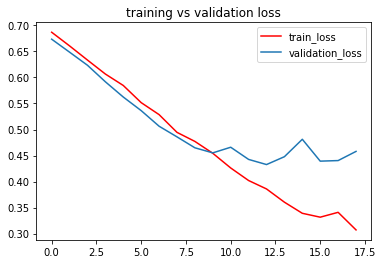

In [43]:
epochs = np.arange(0,len(H.history['loss']))

plt.plot(epochs,H.history['loss'],label='train_loss',c='red')
plt.plot(epochs,H.history['val_loss'],label='validation_loss')
plt.legend()
plt.title("training vs validation loss")